# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [2]:
def find_sum(a,d,N):
    ## Your code here
    result = 0
    for i in range(0, N):
        result += (a + i * d)
    return result

Check yourself

In [3]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [4]:
def check_prime(N):
    ## Your code here
    N = abs(N)
    if N <= 3:
        return N > 1
    i = 2
    while i ** 2 <= N:
        if N % i == 0:
            return False
        i += 1
    return True

Check yourself

In [5]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [6]:
def find_primes(N):
    ## Your code here
    prime_numbers = []
    cur_num = 2
    while N > 0:
        if check_prime(cur_num):
            prime_numbers.append(cur_num)
            N -= 1
        cur_num += 1
    return prime_numbers

Check yourself

In [7]:
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [8]:
def find_max(a, b, c):
    ## Your code here
    if(a >= b and a >= c):
        return a
    if(b >= a and b >= c):
        return b
    return c

Check yourself

In [9]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (-39, -16, -52)
Checking on (89, -47, -23)
Checking on (16, 87, -43)
Checking on (86, 50, -92)
Checking on (33, 0, -97)
Checking on (47, -41, 36)
Checking on (-50, 40, 14)
Checking on (-18, -91, -76)
Checking on (-61, -49, -55)
Checking on (-4, -28, 59)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [10]:
## Your code here
my_array = np.random.rand(20)
my_array = 3 * my_array / my_array.sum()

Check yourself

In [11]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [12]:
def cal_euclidean(a, b):    
    ## Your code here
    return np.sqrt(((a - b) ** 2).sum())

def cal_manhattan(a, b):    
    ## Your code here
    return np.abs(a - b).sum()

    
def cal_cosine(a, b):    
    ## Your code here
    return 1 - a.dot(b) / np.sqrt((a ** 2).sum()) / np.sqrt((b ** 2).sum())

Check yourself

In [13]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [14]:
def custom_scaler(my_array):
    ## Your code here
    return ((my_array - my_array.min()) * 4 / (my_array.max() - my_array.min())) - 2

Check yourself

In [15]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value shoul be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[-95  57 -43  88] ->> [-2.          1.32240437 -0.86338798  2.        ]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [16]:
my_array = np.random.randint(0, 51, size=(5,6))## Your code here
selected_column = my_array[:, my_array.max(axis=0).argmax()]## Your code here

In [17]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[18 20  2 27 28 28]
 [49 30 42 46 50  5]
 [31 18 48  0 16 26]
 [39 40  1 46 24 45]
 [34  3 20 31 43 22]]
Shape: (5, 6)
Selected column [28 50 16 24 43]


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [18]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [0.2   nan 0.18 0.01  nan  nan 0.33 0.8  0.74  nan]


In [19]:
## Your code here
arr[np.isnan(arr)] = arr[~np.isnan(arr)].mean()

print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.2  0.38 0.18 0.01 0.38 0.38 0.33 0.8  0.74 0.38]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [20]:
def mean_channel(X):
    # Your code here
    return X.mean(axis=(0,1))

In [21]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

array([-0.16741071, -0.23214286, -0.75446429])

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [22]:
def get_unique_rows(X):
    # Your code here
    return np.unique(X, axis=0)

In [23]:
X =  np.random.randint(4, 6, size=(n, 2, 2))
print(X)
get_unique_rows(X)

[[[5 4]
  [4 4]]

 [[5 4]
  [4 4]]

 [[4 4]
  [5 5]]

 [[4 4]
  [5 5]]

 [[5 4]
  [4 4]]

 [[4 5]
  [5 5]]

 [[4 5]
  [5 4]]

 [[4 4]
  [5 5]]

 [[4 5]
  [5 5]]

 [[4 5]
  [4 4]]

 [[5 4]
  [5 5]]

 [[5 4]
  [4 4]]

 [[5 4]
  [5 4]]

 [[5 5]
  [5 4]]

 [[4 5]
  [5 5]]

 [[4 5]
  [5 4]]

 [[5 4]
  [5 5]]

 [[5 4]
  [4 5]]

 [[5 5]
  [5 5]]

 [[4 5]
  [4 5]]

 [[4 4]
  [4 4]]

 [[4 5]
  [4 5]]

 [[5 4]
  [4 4]]

 [[4 5]
  [5 5]]

 [[5 4]
  [5 4]]

 [[4 5]
  [5 5]]

 [[4 4]
  [5 5]]

 [[4 5]
  [5 4]]]


array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [24]:
dataset =  pd.read_csv("titanic.csv")## Your code here
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In which columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [25]:
## Your code here
dataset.info()
#There are missing values in 'Age', 'Cabin' and 'Embarked' columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
dataset['Pclass'].unique()
#There were 3 classes on Titatic, namely '1', '2' and '3'

array([3, 1, 2], dtype=int64)

In [27]:
print('Overall percentage of survived:', dataset['Survived'].mean())
print('Class percentage of survived:')
print(dataset.groupby('Pclass')['Survived'].mean())
#Overall, ~0,38% of people survived.
#The classes are not balanced: ~0,63% of people survived in class '1'; ~0,47% of people survived in class '2'; 
#~0,24% of people survived in class '3'.

Overall percentage of survived: 0.3838383838383838
Class percentage of survived:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [28]:
print('Overall average ticket fare: ', dataset['Fare'].mean())
print('Class average ticket fares:')
print(dataset.groupby('Pclass')['Fare'].mean())
#Overall average ticket fare was ~32,20.
#Class '1' average ticket fare was ~84,15.
#Class '2' average ticket fare was ~20,66.
#Class '3' average ticket fare was ~13,68.

Overall average ticket fare:  32.2042079685746
Class average ticket fares:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [29]:
dataset['Embarked'].value_counts()
#The most popular port of embarkation was 'S'.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [30]:
## Your code here
def get_title_out_of_name(name):
    for word in name.split(' '):
        if '.' in word:
            return word
    return None

In [31]:
print(dataset['Name'].apply(get_title_out_of_name).unique())
print(dataset['Name'].apply(get_title_out_of_name).value_counts())
#There are 17 unique titles.
#Number of passengers with every title is provided in a table below.

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Mme.           1
Lady.          1
Capt.          1
Countess.      1
Ms.            1
Jonkheer.      1
Don.           1
Sir.           1
Name: Name, dtype: int64


In [32]:
print(dataset['Name'][dataset['Sex'] == 'male'].apply(get_title_out_of_name).value_counts())
print(dataset['Name'][dataset['Sex'] == 'female'].apply(get_title_out_of_name).value_counts())
#The most popular man's title is 'Mr.'.
#The most popular woman's title is 'Miss.'.

Mr.          517
Master.       40
Dr.            6
Rev.           6
Major.         2
Col.           2
Sir.           1
Jonkheer.      1
Capt.          1
Don.           1
Name: Name, dtype: int64
Miss.        182
Mrs.         125
Mlle.          2
Lady.          1
Countess.      1
Dr.            1
Ms.            1
Mme.           1
Name: Name, dtype: int64


---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

Min age: 0.42
Max age: 80.0
Mean age: 29.69911764705882


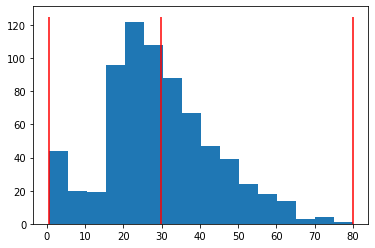

In [33]:
## Your code here
print('Min age:', dataset['Age'].min())
print('Max age:', dataset['Age'].max())
print('Mean age:', dataset['Age'].mean())
plt.hist(dataset['Age'], bins=16)
plt.vlines(dataset['Age'].min(), 0, 125, color='r')
plt.vlines(dataset['Age'].mean(), 0, 125, color='r')
plt.vlines(dataset['Age'].max(), 0, 125, color='r')
plt.show()
#Min age is 0,42. Max age is 80,0. Mean age is 29,70.
#Most of the passengers were aged from 20 to 25. With the growth of age the number of passengers gradually decreases.
#There were few passengers aged under 15 and about half of them were aged under 5.

---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

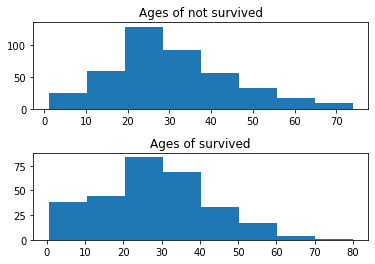

In [34]:
## You code here
fig, axs = plt.subplots(2, 1)
axs[0].hist(dataset['Age'][dataset['Survived'] == 0], bins=8)
axs[0].title.set_text('Ages of not survived')
axs[1].hist(dataset['Age'][dataset['Survived'] == 1], bins=8)
axs[1].title.set_text('Ages of survived')
plt.subplots_adjust(hspace=0.5)
#In both groups most of the passengers were aged from 20 to 30.
#Percent of children in group of not survived is higher than in group of survived,
#while percent of middle aged and elderly people in group of not survived is, vice versa, lower than
#in group of survived people.

---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

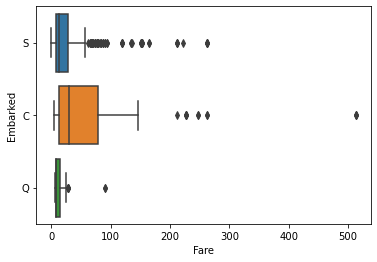

In [35]:
## You code here
sns.boxplot(x='Fare', y='Embarked', data=dataset)
#There are a lot of outliers to be deleted.

In [36]:
dataset1 = dataset[0:0]
for embarkation_id, embarkation in dataset.groupby('Embarked'):
    Q1 = embarkation['Fare'].quantile(0.25)
    Q3 = embarkation['Fare'].quantile(0.75)
    dataset1 = pd.concat([dataset1, embarkation[(embarkation['Fare'] > 2.5 * Q1 - 1.5 * Q3) & (embarkation['Fare'] < 1.5 * Q3 - 0.5 * Q1)]], ignore_index=True)
dataset1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
2,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
3,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
4,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
735,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
736,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
737,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
738,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

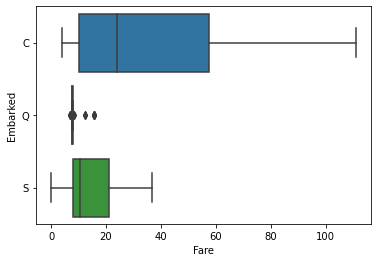

In [37]:
sns.boxplot(x='Fare', y='Embarked', data=dataset1)
#It is clearly seen that price correlates with the embarkation. In case of 'C' embarkation price of tickets varies a lot 
#(from cheap to outstandingly expensive), unlike in case of 'Q' embarkation, where min~max~mean and is the lowest mean value.
#In case of 'S' embarkation ticket price contains its overall minimum value, but it also varies, as its local maximum value
#is higher than mean in case of 'C'.

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

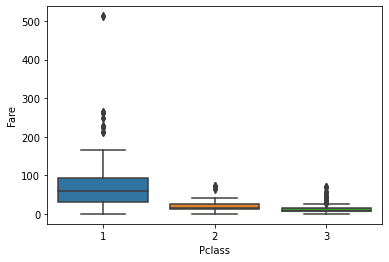

In [38]:
## You code here
sns.boxplot(x='Pclass', y='Fare', data=dataset)

In [39]:
dataset2 = dataset[0:0]
for embarkation_id, embarkation in dataset.groupby('Pclass'):
    Q1 = embarkation['Fare'].quantile(0.25)
    Q3 = embarkation['Fare'].quantile(0.75)
    dataset2 = pd.concat([dataset2, embarkation[(embarkation['Fare'] > 2.5 * Q1 - 1.5 * Q3) & (embarkation['Fare'] < 1.5 * Q3 - 0.5 * Q1)]], ignore_index=True)
dataset2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
4,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
738,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
739,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
740,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
741,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

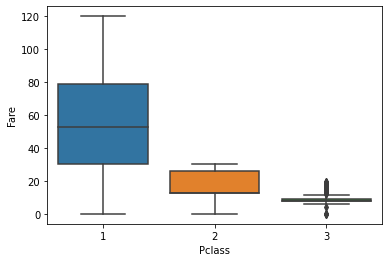

In [40]:
sns.boxplot(x='Pclass', y='Fare', data=dataset2)
#Ticket prices definitely depend on class. In case of '3' class ticket price doe not vary essentially.
#Tickets in class '1' vary most and its mean is significantly higher, than maximums in other classes.